# 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Import Dataset

**Coulumn Descriptions**
- country : the country in which the indicators are from (i.e. United States of America or Congo)
- year : the calendar year the indicators are from (ranging from 2000 to 2015)
- status = whether a country is considered to be 'Developing' or 'Developed' by WHO standards
- life_expectancy : the life expectancy of people in years for a particular country and year
- adult_mortality : the adult mortality rate per 1000 population (i.e. number of people dying between 15 and 60 years per - 1000 population); if the rate is 263 then that means 263 people will die out of 1000 between the ages of 15 and 60; another way - to think of this is that the chance an individual will die between 15 and 60 is 26.3%

- infant_deaths : number of infant deaths per 1000 population; similar to above, but for infants

- alcohol : a country's alcohol consumption rate measured as liters of pure alcohol consumption per capita
- percentage_expenditure : expenditure on health as a percentage of Gross Domestic Product (gdp)
- hepatitis_b : number of 1 year olds with Hepatitis B immunization over all 1 year olds in population
- measles = number of reported Measles cases per 1000 population
- BMI : average Body Mass Index (BMI) of a country's total population
- under-five_deaths : number of people under the age of five deaths per 1000 population
- polio : number of 1 year olds with Polio immunization over the number of all 1 year olds in population
- total_expenditure : government expenditure on health as a percentage of total government expenditure
- DPT: Diphtheria tetanus toxoid and pertussis (DTP3) immunization rate of 1 year olds
- hiv/aids : deaths per 1000 live births caused by HIV/AIDS for people under 5; number of people under 5 who die due to - HIV/AIDS per 1000 births
- gdp : Gross Domestic Product per capita
- populatio : population of a country
- thinness_1-19_years : rate of thinness among people aged 10-19 (Note: variable should be renamed to thinness_10-- 19_years to more accurately represent the variable)
- thinness_5-9_years : rate of thinness among people aged 5-9
- HDI : Human Development Index in terms of income composition of resources (index ranging - from 0 to 1)
- schooling = average number of years of schooling of a population

`This dataset use to predict life expectancy in many country.`

In [2]:
df = pd.read_csv("life_expectancy.csv")
df.head()

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,HepB,measles,...,Polio,total_expenditure,DPT,HIV_AIDS,GDP,population,thinness_10_19,thinness_5_9,HDI,school_year
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
#this way to display the hidden columns
pd.options.display.max_columns = 100

In [4]:
df.head()

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,HepB,measles,BMI,u5_deaths,Polio,total_expenditure,DPT,HIV_AIDS,GDP,population,thinness_10_19,thinness_5_9,HDI,school_year
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


# 3. Exploratory Data Analysis (EDA)

### Data Information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 2938 non-null   object 
 1   year                    2938 non-null   int64  
 2   status                  2938 non-null   object 
 3   life_expectancy         2928 non-null   float64
 4   adult_mortality         2928 non-null   float64
 5   infant_deaths           2938 non-null   int64  
 6   alcohol                 2744 non-null   float64
 7   percentage_expenditure  2938 non-null   float64
 8   HepB                    2385 non-null   float64
 9   measles                 2938 non-null   int64  
 10  BMI                     2904 non-null   float64
 11  u5_deaths               2938 non-null   int64  
 12  Polio                   2919 non-null   float64
 13  total_expenditure       2712 non-null   float64
 14  DPT                     2919 non-null   

In [6]:
df.shape

(2938, 22)

`The dataseet have 2938 rows and 22 columns`

###  Check Missing Value

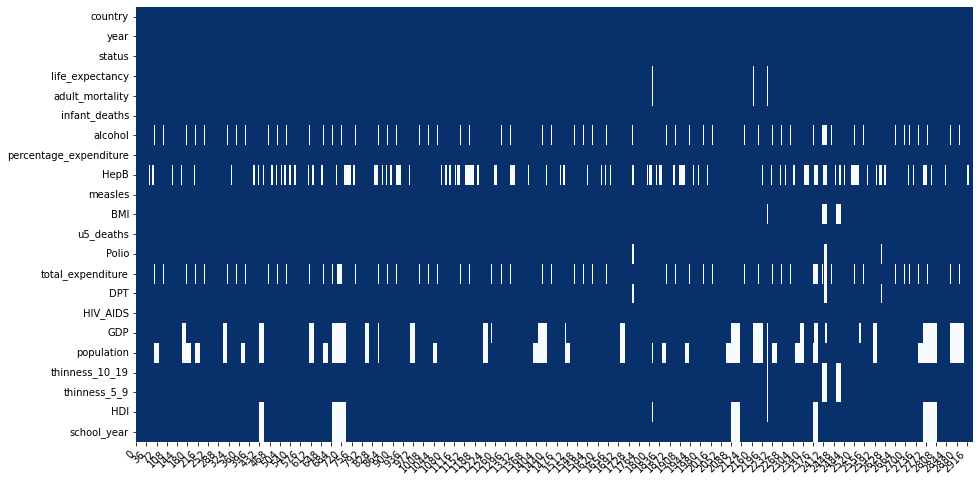

In [7]:
plot_missing_value(df)

`Based on plot the missing value, a target variable has a missing value that don't be use. Thus, I'll eliminate the missing value on target variable.`

In [8]:
df = df[~df.life_expectancy.isna()]

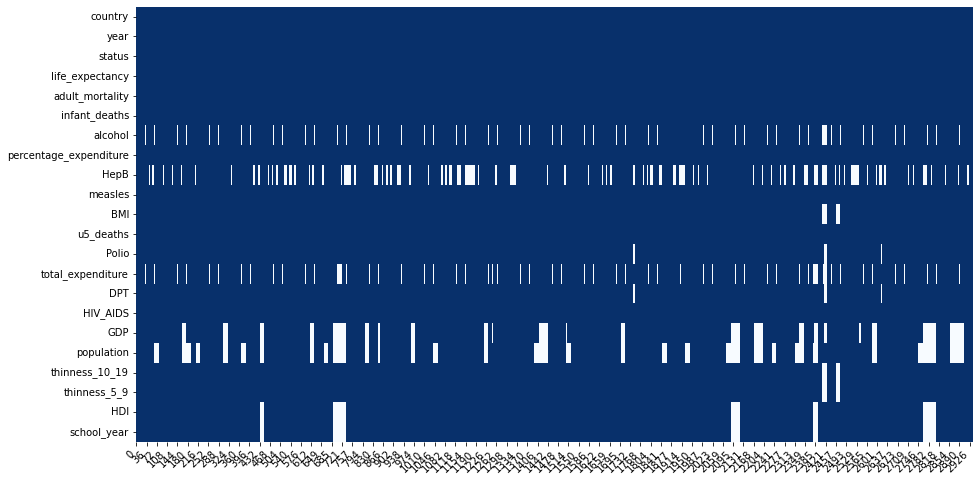

In [9]:
plot_missing_value(df)

`The missing value on target variable has been clean. But, the dataset still having much missing value on columns. I don't eliminate the column that have missing values because I think each columns having importance information for condition of life expectancy in every country. Despite of the column have a missing value, it can be handled in Pipeline.`

In [10]:
df.shape

(2928, 22)

`Now the dataset have 2928 rows and 22 columns`

In [11]:
df.head()

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,HepB,measles,BMI,u5_deaths,Polio,total_expenditure,DPT,HIV_AIDS,GDP,population,thinness_10_19,thinness_5_9,HDI,school_year
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


### Rename several columns

In [12]:
df.rename(columns={'thinness_10_19': 'thinness_10-19_years'}, inplace= True)
df.rename(columns={'thinness_5_9': 'thinness_5-9_years'}, inplace = True)

df.head()

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,HepB,measles,BMI,u5_deaths,Polio,total_expenditure,DPT,HIV_AIDS,GDP,population,thinness_10-19_years,thinness_5-9_years,HDI,school_year
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


### Data Description

In [13]:
df.describe()

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,HepB,measles,BMI,u5_deaths,Polio,total_expenditure,DPT,HIV_AIDS,GDP,population,thinness_10-19_years,thinness_5-9_years,HDI,school_year
count,2928.00000,2928.000000,2928.000000,2928.000000,2735.000000,2928.000000,2375.000000,2928.000000,2896.000000,2928.000000,2909.000000,2702.000000,2909.000000,2928.000000,2485.000000,2.284000e+03,2896.000000,2896.000000,2768.000000,2768.000000
mean,2007.50000,69.224932,164.796448,30.407445,4.614856,740.321185,80.960842,2427.855874,38.235394,42.179303,82.548298,5.930163,82.321416,1.747712,7494.210719,1.276454e+07,4.850622,4.881423,0.627419,11.999639
std,4.61056,9.523867,124.292079,118.114450,4.050749,1990.930605,25.018337,11485.970937,19.959590,160.700547,23.416674,2.483273,23.706644,5.085542,14282.251492,6.103765e+07,4.420829,4.509609,0.210978,3.346440
min,2000.00000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2003.75000,63.100000,74.000000,0.000000,0.905000,4.853964,77.000000,0.000000,19.300000,0.000000,78.000000,4.260000,78.000000,0.100000,463.852618,1.966738e+05,1.600000,1.575000,0.493000,10.100000
50%,2007.50000,72.100000,144.000000,3.000000,3.770000,65.611455,92.000000,17.000000,43.350000,4.000000,93.000000,5.750000,93.000000,0.100000,1764.973870,1.391756e+06,3.300000,3.400000,0.677000,12.300000
75%,2011.25000,75.700000,228.000000,22.000000,7.715000,442.614322,97.000000,362.250000,56.100000,28.000000,97.000000,7.490000,97.000000,0.800000,5932.899677,7.426746e+06,7.200000,7.200000,0.779250,14.300000
max,2015.00000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,77.600000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


`Several columns suspected having values that doesn't make sense:`

1. It doesn't make sense people have BMI = 1. Thus, I'll eliminate it.
2. I think is impossible an adult mortality is 1 in this situation. Thus, I'll replace that number of value by median.
3. It is possible of infant deaths is 0 in this situatuon? I don't think so. Thus, I'll replace that number of value by median.
4. It is possible percentage expenditure in a country is 0 in this situation? I don't think so. Thus, I'll replace that number of value by median.

### Handle BMI Column

In [14]:
df[df.BMI == 1]

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,HepB,measles,BMI,u5_deaths,Polio,total_expenditure,DPT,HIV_AIDS,GDP,population,thinness_10-19_years,thinness_5-9_years,HDI,school_year
2887,Viet Nam,2002,Developing,73.8,137.0,30,2.03,0.0,NaN,6755,1.0,39,92.0,4.7,75.0,0.2,NaN,NaN,15.6,16.3,0.584,10.7


In [15]:
df = df.drop([2887], axis = 0)

### Handle others column by median

In [16]:
df.adult_mortality = df.adult_mortality.replace(1, df.adult_mortality.median())
df.infant_deaths = df.infant_deaths.replace(0, df.infant_deaths.median())
df.percentage_expenditure = df.percentage_expenditure.replace(0, df.percentage_expenditure.median())

## A. Numerical Features

### Target Variable Distribution

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='life_expectancy', ylabel='Density'>

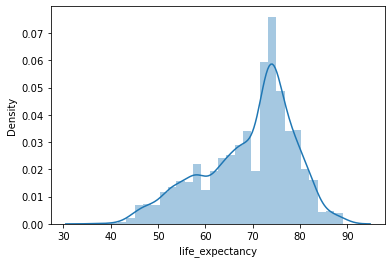

In [17]:
sns.distplot(df['life_expectancy'], kde = True)

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='life_expectancy'>

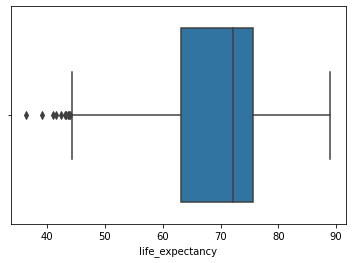

In [18]:
sns.boxplot(df['life_expectancy'])

### Numeric Variable Distribution

In [19]:
df.columns

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'HepB', 'measles',
       'BMI', 'u5_deaths', 'Polio', 'total_expenditure', 'DPT', 'HIV_AIDS',
       'GDP', 'population', 'thinness_10-19_years', 'thinness_5-9_years',
       'HDI', 'school_year'],
      dtype='object')

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

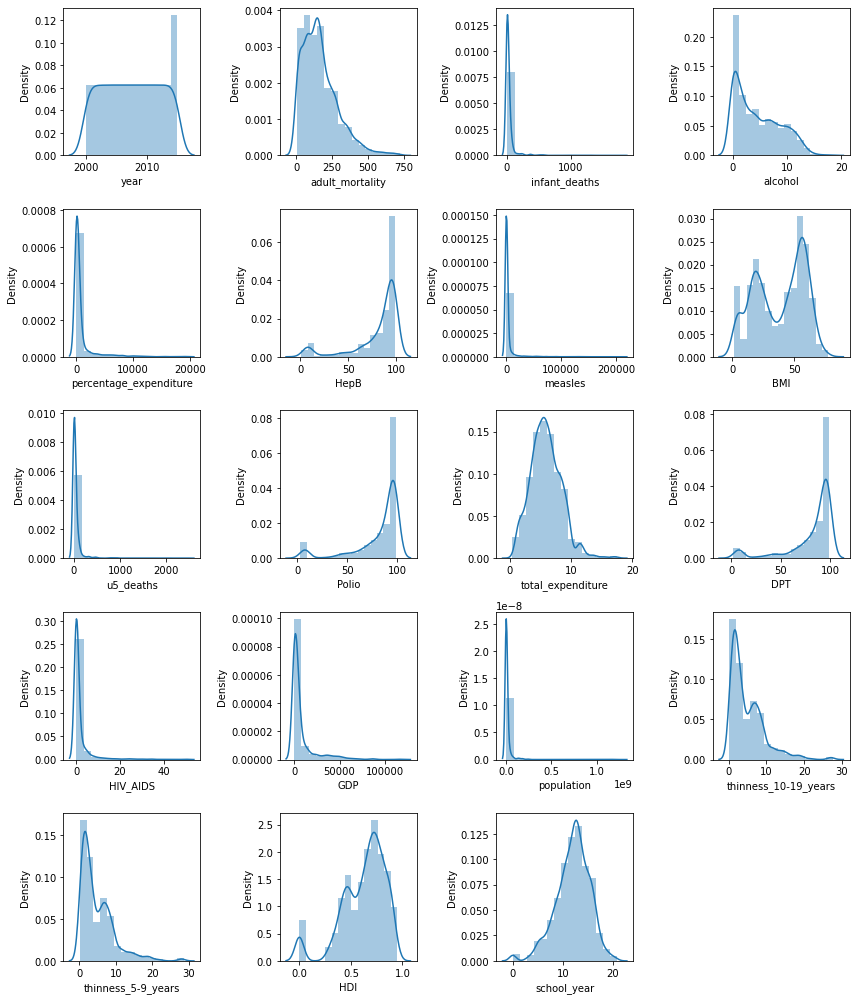

In [20]:
numeric = ['year','adult_mortality','infant_deaths','alcohol','percentage_expenditure','HepB','measles'
           ,'BMI','u5_deaths','Polio','total_expenditure','DPT','HIV_AIDS','GDP','population','thinness_10-19_years','thinness_5-9_years',
          'HDI','school_year']

x = plt.figure(figsize=(12, 14))

for i, j in enumerate(numeric):
    x.add_subplot(5, 4, i+1)
    sns.distplot(df[j], bins=15)
    x.tight_layout()

plt.tight_layout()

`Although several columns have a skewed, I don't handle it because maybe the number of value supposed to be. But, if the model has higher value of error, I'll handle that in the evaluation part.`

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning

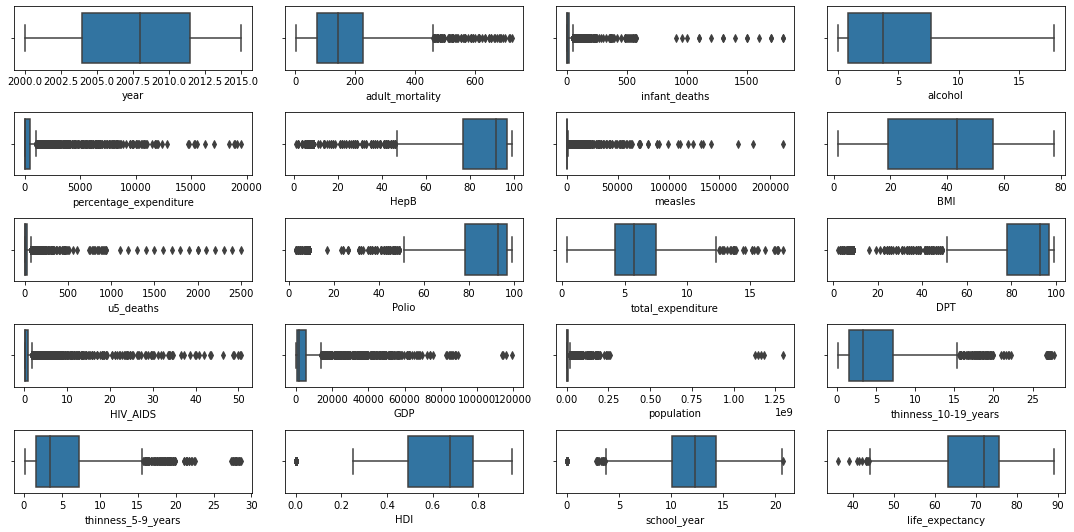

In [21]:
fig, axs = plt.subplots(5,4, figsize = (15,7.5))
sns.boxplot(df['year'], ax = axs[0,0])
sns.boxplot(df['adult_mortality'], ax = axs[0,1])
sns.boxplot(df['infant_deaths'], ax = axs[0,2])
sns.boxplot(df['alcohol'], ax = axs[0,3])
sns.boxplot(df['percentage_expenditure'], ax = axs[1,0])
sns.boxplot(df['HepB'], ax = axs[1,1])
sns.boxplot(df['measles'], ax = axs[1,2])
sns.boxplot(df['BMI'], ax = axs[1,3])
sns.boxplot(df['u5_deaths'], ax = axs[2,0])
sns.boxplot(df['Polio'], ax = axs[2,1])
sns.boxplot(df['total_expenditure'], ax = axs[2,2])
sns.boxplot(df['DPT'], ax = axs[2,3])
sns.boxplot(df['HIV_AIDS'], ax = axs[3,0])
sns.boxplot(df['GDP'], ax = axs[3,1])
sns.boxplot(df['population'], ax = axs[3,2])
sns.boxplot(df['thinness_10-19_years'], ax = axs[3,3])
sns.boxplot(df['thinness_5-9_years'], ax = axs[4,0])
sns.boxplot(df['HDI'], ax = axs[4,1])
sns.boxplot(df['school_year'], ax = axs[4,2])
sns.boxplot(df['life_expectancy'], ax = axs[4,3])



plt.tight_layout()
plt.show()

`So many columns have outliers. But, I don't handle that right now because maybe the number of value supposed to be like that. But, if the model has higher value of error, I’ll handle in the evaluation part.`

## Correlation Matrix

In [22]:
from jcopml.plot import plot_correlation_matrix

In [23]:
plot_correlation_matrix(df,target_col='life_expectancy', numeric_col='auto')

interactive(children=(ToggleButtons(description='method', options=('spearman', 'kendall', 'pearson', 'pearson_…

`Because Github can't display the correlation plot, I've captured a picture of it.`

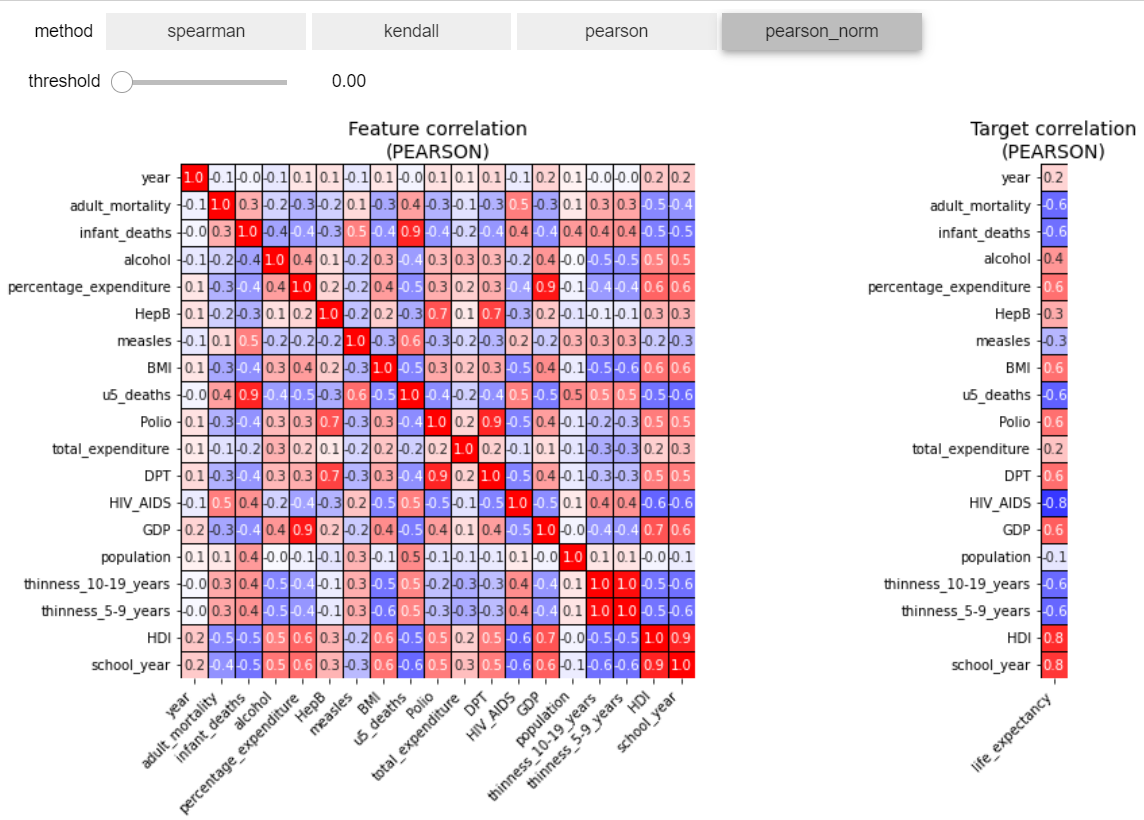

`From correlation matrix analysis by using pearson normalization (pearson_norm), several columns have a strong positive and negative correlation on target variable with a threshold 0.5`

**Positive Correlation**
1. percentage_expenditure
2. HDI
3. BMI
4. DPT
5. Polio
6. GDP
7. school_year

**Negative Correlation**
1. adult_mortality
2. infant_deaths
3. u5_deaths
4. HIV_AIDS
5. thinness_10-19_years
6. thinness_5-9_years

### Life expectancy every year in many countries

In [24]:
plt.style.use('fivethirtyeight')

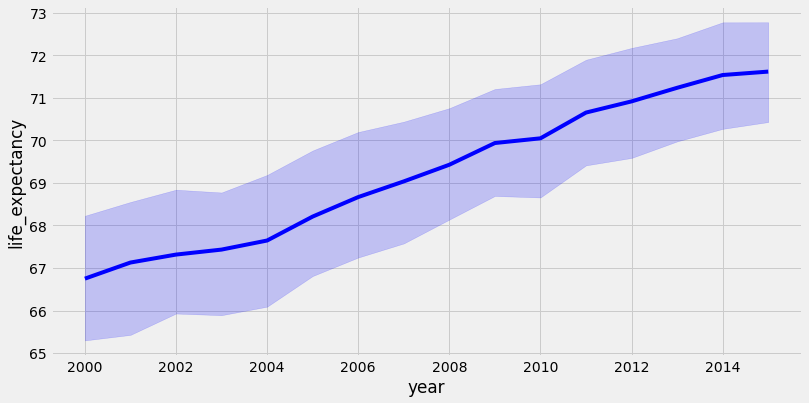

In [25]:
plt.figure(figsize=(12, 6))
plot = sns.lineplot(x='year', y = 'life_expectancy', color= 'b', data=df)
plt.setp(plot.get_xticklabels(), rotation=0);

`Life expectancy is growing up every year`

## Positive Correlation

### percentage_expenditure vs life_expectancy

In [26]:
a = df.groupby('year').agg({'percentage_expenditure':'mean', 'life_expectancy':'mean'})
a

,percentage_expenditure,life_expectancy
year,,
2000,484.614111,66.750273
2001,527.030462,67.128962
2002,489.515208,67.315934
2003,505.111099,67.433333
2004,782.381931,67.646448
2005,833.005107,68.209290
2006,838.463316,68.667760
2007,964.145465,69.036066
2008,1105.848443,69.427869


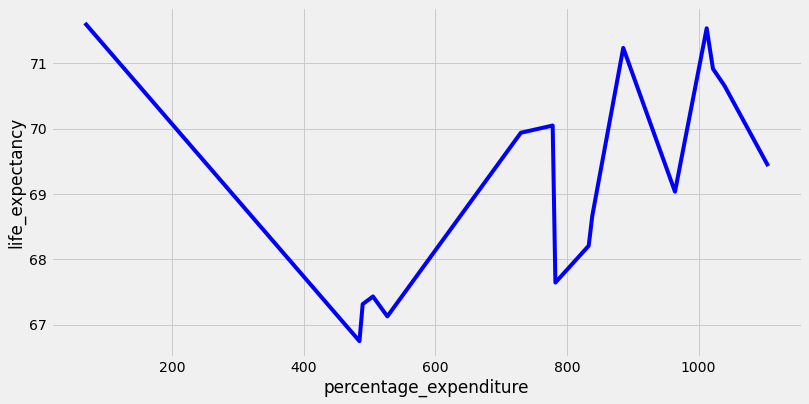

In [27]:
plt.figure(figsize=(12, 6))
plot = sns.lineplot(x='percentage_expenditure', y = 'life_expectancy', color= 'b', data=a)
plt.setp(plot.get_xticklabels(), rotation=0);

### HDI vs life_expectancy

In [28]:
b = df.groupby('year').agg({'HDI':'mean', 'life_expectancy':'mean'})
b

,HDI,life_expectancy
year,,
2000,0.512214,66.750273
2001,0.563012,67.128962
2002,0.567913,67.315934
2003,0.572399,67.433333
2004,0.584168,67.646448
2005,0.596445,68.209290
2006,0.632312,68.667760
2007,0.639000,69.036066
2008,0.645717,69.427869


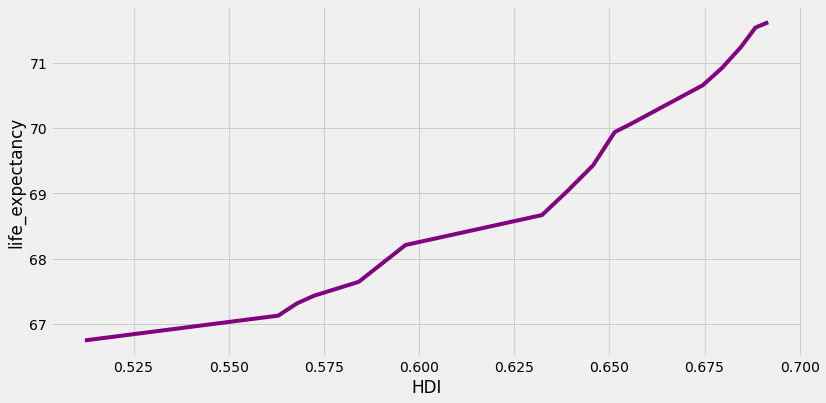

In [29]:
plt.figure(figsize=(12, 6))
plot = sns.lineplot(x='HDI', y = 'life_expectancy', color= 'purple', data=b)
plt.setp(plot.get_xticklabels(), rotation=0);

### BMI vs life_expectancy

In [30]:
c = df.groupby('year').agg({'BMI':'mean', 'life_expectancy':'mean'})
c

,BMI,life_expectancy
year,,
2000,34.424862,66.750273
2001,36.135912,67.128962
2002,37.311111,67.315934
2003,36.440331,67.433333
2004,36.572376,67.646448
2005,35.607735,68.209290
2006,37.534254,68.667760
2007,36.977901,69.036066
2008,38.225414,69.427869


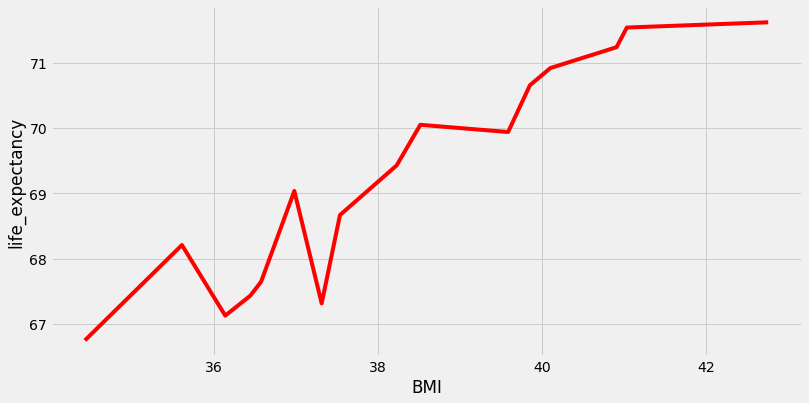

In [31]:
plt.figure(figsize=(12, 6))
plot = sns.lineplot(x='BMI', y = 'life_expectancy', color= 'r', data=c)
plt.setp(plot.get_xticklabels(), rotation=0);

### DPT vs life_expectancy

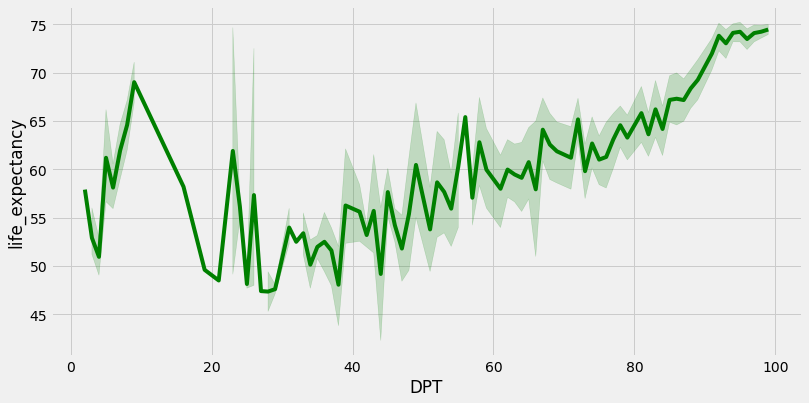

In [32]:
plt.figure(figsize=(12, 6))
plot = sns.lineplot(x='DPT', y = 'life_expectancy', color= 'g', data=df)
plt.setp(plot.get_xticklabels(), rotation=0);

### Polio vs life_expectancy

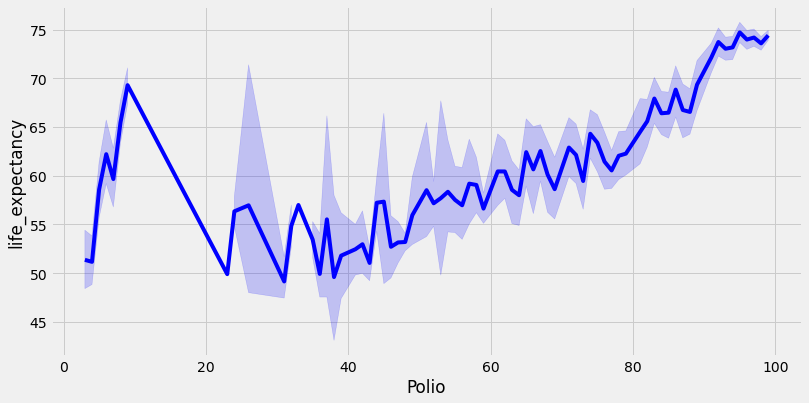

In [33]:
plt.figure(figsize=(12, 6))
plot = sns.lineplot(x ='Polio', y = 'life_expectancy', color= 'b', data= df)
plt.setp(plot.get_xticklabels(), rotation=0);

### GDP vs life_expectancy 

In [34]:
f = df.groupby('year').agg({'GDP':'mean', 'life_expectancy':'mean'})
f

,GDP,life_expectancy
year,,
2000,4708.515191,66.750273
2001,4854.527638,67.128962
2002,4599.303043,67.315934
2003,4774.835677,67.433333
2004,7055.889709,67.646448
2005,7249.787557,68.209290
2006,7347.033143,68.667760
2007,8537.243114,69.036066
2008,10604.040364,69.427869


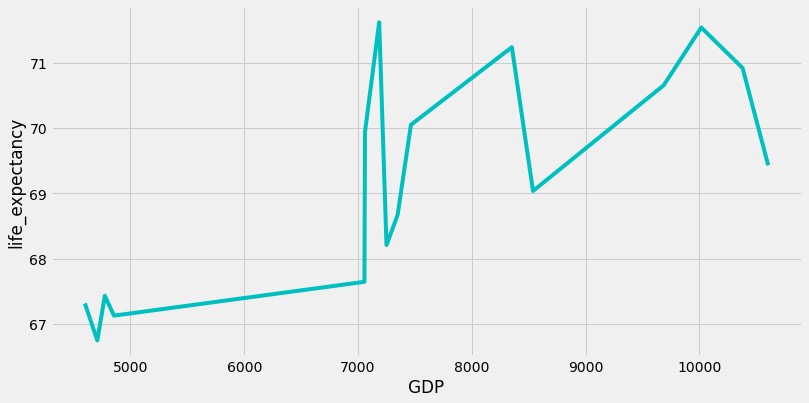

In [35]:
plt.figure(figsize=(12, 6))
plot = sns.lineplot(x ='GDP', y = 'life_expectancy', color= 'c', data= f)
plt.setp(plot.get_xticklabels(), rotation=0);

### school_year vs life_expectancy

In [36]:
h = df.groupby('year').agg({'school_year':'mean', 'life_expectancy':'mean'})
h

,school_year,life_expectancy
year,,
2000,10.512717,66.750273
2001,10.950289,67.128962
2002,11.143023,67.315934
2003,11.308092,67.433333
2004,11.547399,67.646448
2005,11.675723,68.209290
2006,11.917919,68.667760
2007,12.038150,69.036066
2008,12.176301,69.427869


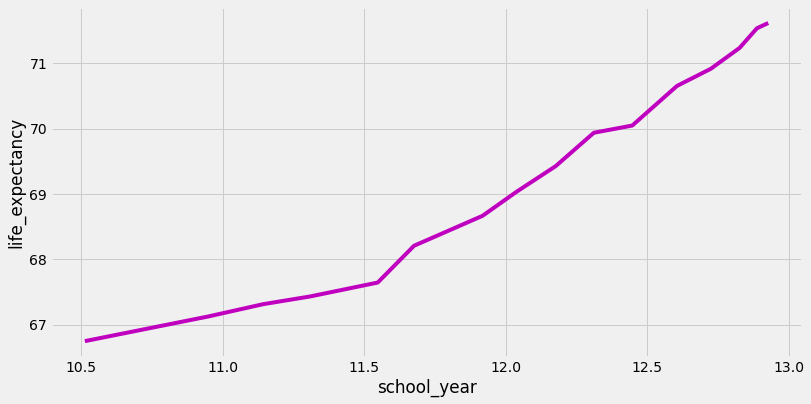

In [37]:
plt.figure(figsize=(12, 6))
plot = sns.lineplot(x ='school_year', y = 'life_expectancy', color= 'm', data=h)
plt.setp(plot.get_xticklabels(), rotation=0);

## Negative Correlation

### adult_mortality vs life_expectation

In [38]:
df.adult_mortality

0       263.0
1       271.0
2       268.0
3       272.0
4       275.0
        ...  
2933    723.0
2934    715.0
2935     73.0
2936    686.0
2937    665.0
Name: adult_mortality, Length: 2927, dtype: float64

In [39]:
df.adult_mortality = df.adult_mortality.astype(int)

In [40]:
h = df.groupby('year').agg({'adult_mortality':'sum', 'life_expectancy':'mean'})
h

,adult_mortality,life_expectancy
year,,
2000,33210,66.750273
2001,32485,67.128962
2002,31236,67.315934
2003,31237,67.433333
2004,34086,67.646448
2005,30677,68.209290
2006,31613,68.667760
2007,29388,69.036066
2008,32080,69.427869


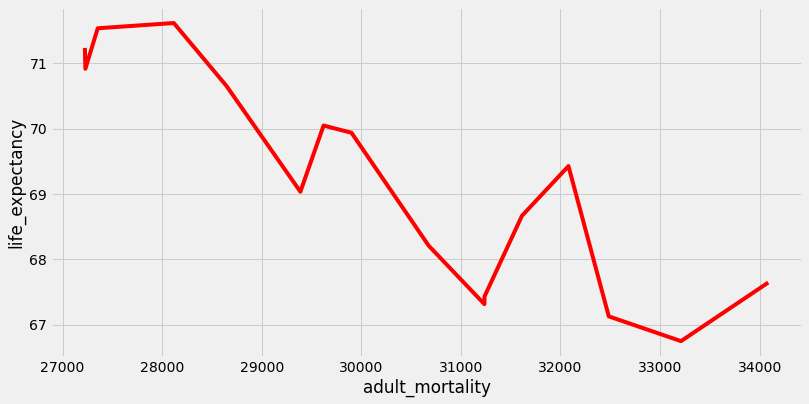

In [41]:
plt.figure(figsize=(12, 6))
plot = sns.lineplot(x ='adult_mortality', y = 'life_expectancy', color= 'r', data=h)
plt.setp(plot.get_xticklabels(), rotation=0);

### infant_deaths vs life_expectation

In [42]:
i = df.groupby('year').agg({'infant_deaths':'sum', 'life_expectancy':'mean'})
i

,infant_deaths,life_expectancy
year,,
2000,7014,66.750273
2001,6883,67.128962
2002,6626,67.315934
2003,6535,67.433333
2004,6307,67.646448
2005,6076,68.209290
2006,5971,68.667760
2007,5752,69.036066
2008,5561,69.427869


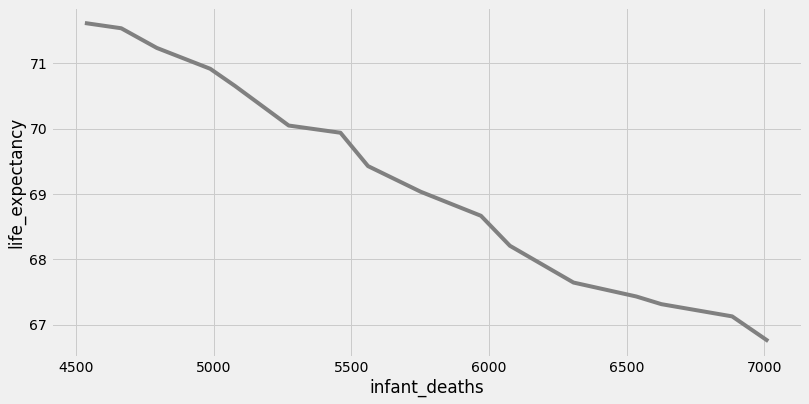

In [43]:
plt.figure(figsize=(12, 6))
plot = sns.lineplot(x ='infant_deaths', y = 'life_expectancy', color= 'grey', data=i)
plt.setp(plot.get_xticklabels(), rotation=0);

### u5_deaths vs life_expectancy

In [44]:
j = df.groupby('year').agg({'u5_deaths':'sum', 'life_expectancy':'mean'})
j

,u5_deaths,life_expectancy
year,,
2000,9832,66.750273
2001,9523,67.128962
2002,9166,67.315934
2003,8891,67.433333
2004,8618,67.646448
2005,8291,68.209290
2006,8102,68.667760
2007,7820,69.036066
2008,7562,69.427869


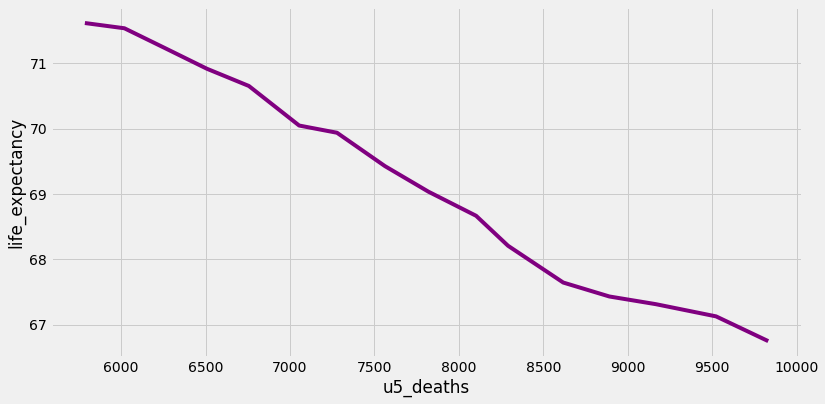

In [45]:
plt.figure(figsize=(12, 6))
plot = sns.lineplot(x ='u5_deaths', y = 'life_expectancy', color= 'purple', data=j)
plt.setp(plot.get_xticklabels(), rotation=0);

### HIV_AIDS vs life_expectancy

In [46]:
k = df.groupby('year').agg({'HIV_AIDS':'mean', 'life_expectancy':'mean'})
k

,HIV_AIDS,life_expectancy
year,,
2000,2.530055,66.750273
2001,2.573770,67.128962
2002,2.586813,67.315934
2003,2.546995,67.433333
2004,2.478689,67.646448
2005,2.345902,68.209290
2006,2.169399,68.667760
2007,1.992896,69.036066
2008,1.797268,69.427869


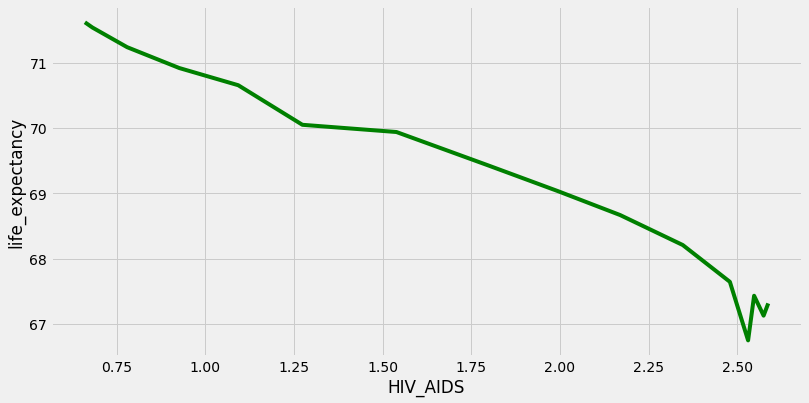

In [47]:
plt.figure(figsize=(12, 6))
plot = sns.lineplot(x ='HIV_AIDS', y = 'life_expectancy', color= 'g', data=k)
plt.setp(plot.get_xticklabels(), rotation=0);

### thinness_10-19_years vs life_expectancy

In [48]:
l = df.groupby('year').agg({'thinness_10-19_years':'mean', 'life_expectancy':'mean'})
l

,thinness_10-19_years,life_expectancy
year,,
2000,5.147514,66.750273
2001,4.957459,67.128962
2002,5.108333,67.315934
2003,4.924309,67.433333
2004,4.936464,67.646448
2005,5.099448,68.209290
2006,5.115470,68.667760
2007,5.034807,69.036066
2008,4.907182,69.427869


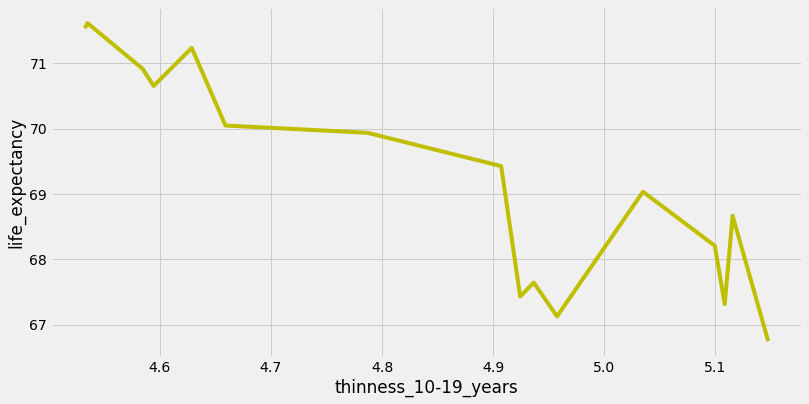

In [49]:
plt.figure(figsize=(12, 6))
plot = sns.lineplot(x ='thinness_10-19_years', y = 'life_expectancy', color= 'y', data=l)
plt.setp(plot.get_xticklabels(), rotation=0);

### thinness_5-9_years vs life_expectancy

In [50]:
m = df.groupby('year').agg({'thinness_5-9_years':'mean', 'life_expectancy':'mean'})
m

,thinness_5-9_years,life_expectancy
year,,
2000,5.244751,66.750273
2001,5.055249,67.128962
2002,5.056111,67.315934
2003,5.023757,67.433333
2004,5.029282,67.646448
2005,5.195580,68.209290
2006,5.157459,68.667760
2007,4.976243,69.036066
2008,4.941436,69.427869


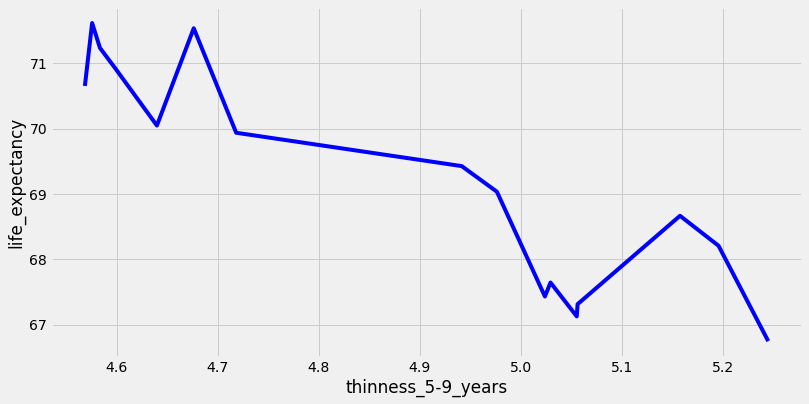

In [51]:
plt.figure(figsize=(12, 6))
plot = sns.lineplot(x ='thinness_5-9_years', y = 'life_expectancy', color= 'b', data=m)
plt.setp(plot.get_xticklabels(), rotation=0);

## B. Categorical Features

In [52]:
df.columns

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'HepB', 'measles',
       'BMI', 'u5_deaths', 'Polio', 'total_expenditure', 'DPT', 'HIV_AIDS',
       'GDP', 'population', 'thinness_10-19_years', 'thinness_5-9_years',
       'HDI', 'school_year'],
      dtype='object')

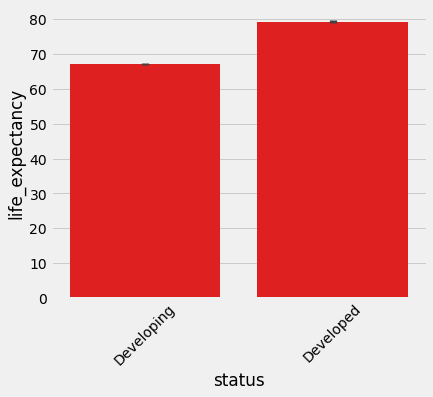

In [53]:
plt.figure(figsize=(6, 5))
plot = sns.barplot(x='status', y = 'life_expectancy', color= 'r', data=df)
plt.setp(plot.get_xticklabels(), rotation=45);

`Developed countries have higher life expectancy than developing countries`

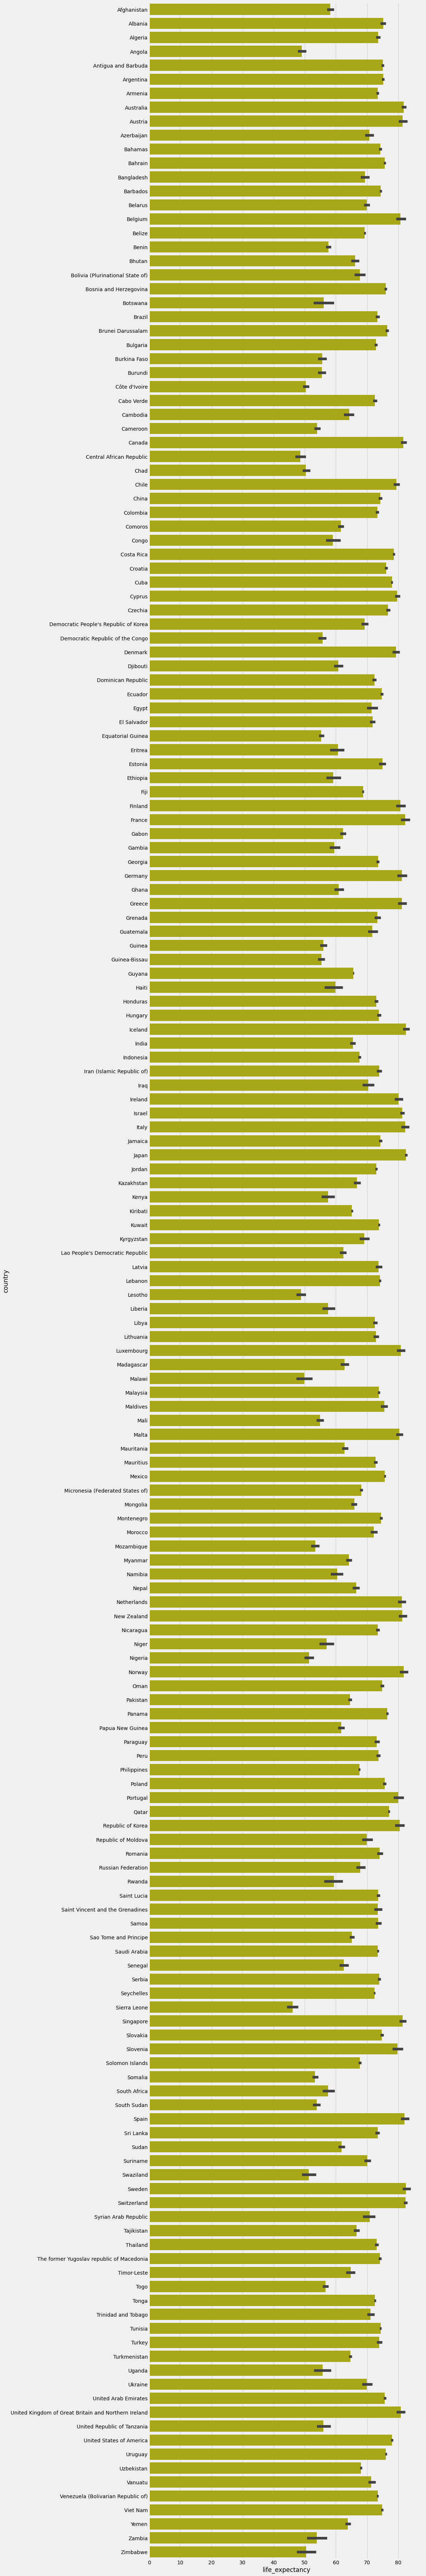

In [54]:
plt.figure(figsize=(12, 120))
plot = sns.barplot(x='life_expectancy', y = 'country', color= 'y', data=df)
plt.setp(plot.get_xticklabels(), rotation=0);

`This plot figure out life ecxpectancy for each country`

# 4. Dataset Splitting

In [55]:
X = df.drop(columns="life_expectancy")
y = df.life_expectancy

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2341, 21), (586, 21), (2341,), (586,))

# 5. Modeling

In [56]:
X_train

,country,year,status,adult_mortality,infant_deaths,alcohol,percentage_expenditure,HepB,measles,BMI,u5_deaths,Polio,total_expenditure,DPT,HIV_AIDS,GDP,population,thinness_10-19_years,thinness_5-9_years,HDI,school_year
2268,Serbia,2012,Developing,126,1,9.38,742.510971,97.0,0,58.3,1,93.0,9.89,91.0,0.1,5659.382400,719977.0,2.1,2.1,0.767,14.0
1680,Mauritius,2002,Developing,179,3,4.14,369.631710,88.0,0,26.4,0,88.0,4.24,88.0,0.1,3957.512960,124621.0,7.9,7.9,0.683,12.5
2785,United Republic of Tanzania,2008,Developing,376,92,3.44,65.656313,86.0,3413,19.6,138,89.0,4.21,86.0,7.4,NaN,NaN,7.3,7.3,NaN,NaN
2512,Sweden,2008,Developed,62,3,6.90,8105.590882,NaN,25,56.5,0,98.0,9.23,98.0,0.1,55746.842380,9219637.0,1.3,1.3,0.897,15.7
1090,Guinea-Bissau,2015,Developing,275,4,NaN,65.656313,87.0,153,26.3,6,87.0,NaN,87.0,3.2,596.871719,177526.0,7.1,7.0,0.421,9.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1640,Malta,2009,Developed,63,3,7.38,335.518057,86.0,1,67.1,0,73.0,8.33,73.0,0.1,2675.582590,412477.0,0.8,0.7,0.815,14.4
1097,Guinea-Bissau,2008,Developing,297,5,2.64,28.301911,NaN,12,21.9,7,77.0,6.50,77.0,6.0,583.544562,148841.0,8.5,8.4,0.398,8.8
1132,Haiti,2005,Developing,29,17,5.57,38.109043,NaN,0,38.5,24,6.0,4.41,6.0,3.9,465.311876,926344.0,4.4,4.4,0.452,8.2
1296,Italy,2001,Developed,75,2,9.69,3.122230,95.0,0,55.7,3,96.0,8.11,93.0,0.1,24.819000,569741.0,0.5,0.5,0.828,14.9


In [57]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import RandomizedSearchCV
from jcopml.tuning import random_search_params as rsp
import category_encoders as ce
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [58]:
cat_pipe2 = Pipeline([
    ('imputer', SimpleImputer(strategy = 'most_frequent')),
    ('BinaryEncoder', ce.BinaryEncoder())
])

In [59]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), ['year','adult_mortality','infant_deaths','alcohol','percentage_expenditure','HepB','measles','BMI',
                             'u5_deaths','Polio','total_expenditure','DPT','HIV_AIDS','GDP','population','thinness_10-19_years','thinness_5-9_years','HDI','school_year']),
    ('categoric', cat_pipe(encoder='onehot'), ["status"]),
    ('categoric2', cat_pipe2, ['country'])
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', ElasticNet())
])


model = RandomizedSearchCV(pipeline, rsp.enet_params, cv=5,  n_iter= 150, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 5 folds for each of 150 candidates, totalling 750 fits
{'algo__alpha': 0.0031315069138816254, 'algo__fit_intercept': True, 'algo__l1_ratio': 0.5398410913016732}
0.8352667600937075 0.8258706377998051 0.834662671917675


C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.779e+04, tolerance: 2.147e+01
  model = cd_fast.enet_coordinate_descent(


# 6. Feature Importance

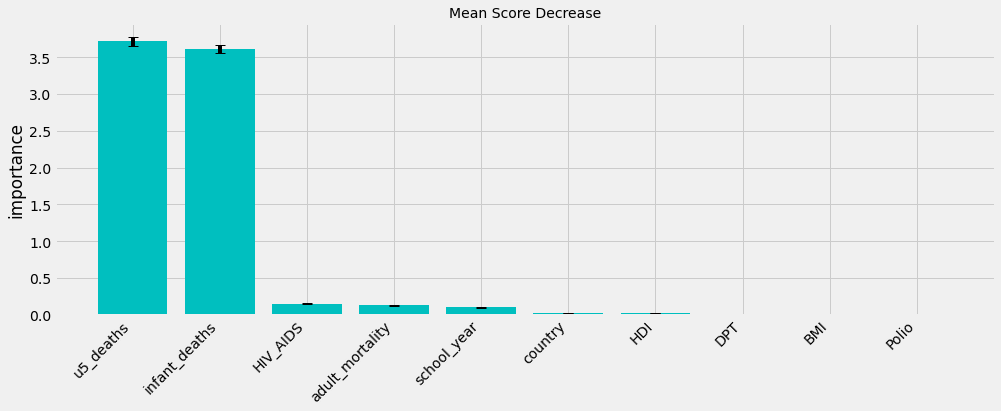

In [60]:
df_imp = mean_score_decrease(X_train, y_train, model, plot=True, topk=10)

`There are only 5 columns that importance to use`

In [61]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), ['HIV_AIDS', 'adult_mortality', 'school_year', 'u5_deaths', 'infant_deaths'])
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', ElasticNet())
])


model = RandomizedSearchCV(pipeline, rsp.enet_params, cv=5,  n_iter= 150, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 5 folds for each of 150 candidates, totalling 750 fits
{'algo__alpha': 0.00893511059033186, 'algo__fit_intercept': True, 'algo__l1_ratio': 0.5912977877077272}
0.769862921126971 0.7653648950930793 0.7755716399106731


C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.381e+04, tolerance: 2.147e+01
  model = cd_fast.enet_coordinate_descent(


`So Feature Importance doesn't work to increase the test scores model. Thus, I still use all the columns`

# 7. Polynomial Feature

In [62]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(poly=2), ['year','adult_mortality','infant_deaths','alcohol','percentage_expenditure','HepB','measles','BMI',
                             'u5_deaths','Polio','total_expenditure','DPT','HIV_AIDS','GDP','population','thinness_10-19_years','thinness_5-9_years','HDI','school_year']),
    ('categoric', cat_pipe(encoder='onehot'), ["status"]),
    ('categoric2', cat_pipe2, ['country'])
])


pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', ElasticNet())
])


model = RandomizedSearchCV(pipeline, rsp.enet_poly_params, cv=5,  n_iter= 150, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 5 folds for each of 150 candidates, totalling 750 fits
{'algo__alpha': 12.102047817315503, 'algo__fit_intercept': True, 'algo__l1_ratio': 0.3193136375904149, 'prep__numeric__poly__degree': 2, 'prep__numeric__poly__interaction_only': True}
0.8734792092981463 0.8368198772086679 0.863429528473381


C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.416e+04, tolerance: 2.147e+01
  model = cd_fast.enet_coordinate_descent(


`Polynomial feature can be increasing test scores more than models that don't`

# 8. Fine Tuning

In [63]:
from jcopml.tuning.space import Integer, Real

In [64]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(poly=2), ['year','adult_mortality','infant_deaths','alcohol','percentage_expenditure','HepB','measles','BMI',
                                  'u5_deaths','Polio','total_expenditure','DPT','HIV_AIDS','GDP','population','thinness_10-19_years','thinness_5-9_years','HDI','school_year']),
    ('categoric', cat_pipe(encoder='onehot'), ["status"]),
    ('categoric2', cat_pipe2, ['country'])
])


pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', ElasticNet())
])


parameter = {'prep__numeric__poly__degree': Integer(low=1, high=3),
             'prep__numeric__poly__interaction_only': [True, False],
             'algo__fit_intercept': [True, False],
             'algo__alpha': Real(low=-4, high=2, prior='log-uniform'),
             'algo__l1_ratio': Real(low=0, high=1, prior='uniform')}


model = RandomizedSearchCV(pipeline, parameter, cv=5,  n_iter= 150, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 5 folds for each of 150 candidates, totalling 750 fits
{'algo__alpha': 12.102047817315503, 'algo__fit_intercept': True, 'algo__l1_ratio': 0.3193136375904149, 'prep__numeric__poly__degree': 2, 'prep__numeric__poly__interaction_only': True}
0.8734792092981463 0.8368198772086679 0.863429528473381


C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.416e+04, tolerance: 2.147e+01
  model = cd_fast.enet_coordinate_descent(


`Tuning parameter can be increasing test scores`

# 9. Evaluation 

In [65]:
from jcopml.plot import plot_residual
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


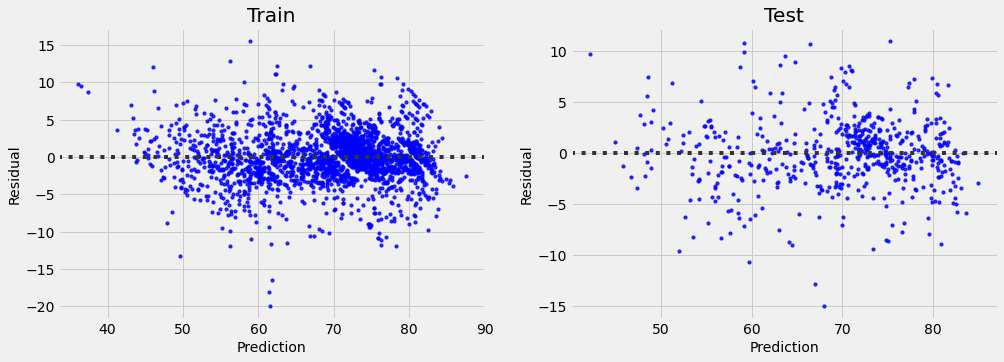

In [66]:
plot_residual(X_train, y_train, X_test, y_test, model)

## Error Checking

In [67]:
df_analysis1 = X_test.copy()
df_analysis1['pred'] = model.predict(X_test)
df_analysis1['actual'] = y_test
df_analysis1['error'] = np.abs(df_analysis1.pred - df_analysis1.actual)
df_analysis1.sort_values('error').head(10)

,country,year,status,adult_mortality,infant_deaths,alcohol,percentage_expenditure,HepB,measles,BMI,u5_deaths,Polio,total_expenditure,DPT,HIV_AIDS,GDP,population,thinness_10-19_years,thinness_5-9_years,HDI,school_year,pred,actual,error
139,Austria,2004,Developed,86,3,12.10,5316.877456,83.0,15,52.2,0,83.0,1.56,83.0,0.1,36693.426200,8171966.00,1.7,1.9,0.841,14.7,79.303968,79.3,0.003968
2288,Seychelles,2008,Developing,184,3,6.33,701.852636,99.0,0,31.8,0,99.0,2.64,99.0,0.1,11122.862700,86956.00,5.9,6.3,0.739,13.2,72.179255,72.2,0.020745
354,Brazil,2013,Developing,146,46,7.24,916.270845,96.0,220,54.5,52,96.0,8.48,97.0,0.1,12216.944600,2248632.00,2.8,2.7,0.734,14.2,74.722775,74.7,0.022775
2897,Yemen,2008,Developing,238,37,0.04,65.656313,78.0,7,35.7,47,78.0,5.12,78.0,0.1,NaN,NaN,13.8,13.7,0.480,8.5,63.829432,63.8,0.029432
2138,Russian Federation,2012,Developing,237,14,10.99,178.822591,97.0,2123,58.7,16,98.0,6.88,97.0,0.3,15154.456870,14321676.00,2.3,2.4,0.792,14.3,69.570165,69.6,0.029835
1318,Japan,2011,Developed,64,3,7.39,9498.729062,NaN,434,27.4,4,96.0,1.70,97.0,0.1,48167.997270,127833.00,1.9,1.6,0.884,15.1,82.469095,82.5,0.030905
2050,Poland,2004,Developed,143,2,9.19,648.074345,98.0,11,55.0,3,99.0,6.19,99.0,0.1,6681.178818,38182222.00,2.4,2.5,0.800,15.5,74.856365,74.9,0.043635
2393,South Africa,2015,Developing,328,42,NaN,65.656313,75.0,17,51.1,52,75.0,NaN,75.0,3.6,5769.772580,5511976.68,4.4,5.3,0.665,13.0,62.847267,62.9,0.052733
1161,Hungary,2008,Developed,165,1,11.64,181.763408,NaN,0,6.5,1,99.0,7.33,99.0,0.1,15669.259290,138188.00,1.9,1.9,0.812,15.3,74.158349,74.1,0.058349
1563,Madagascar,2006,Developing,263,36,0.68,38.418704,82.0,2,16.3,54,83.0,5.11,85.0,0.6,292.157443,1888268.00,8.0,7.9,0.478,9.0,61.330668,61.4,0.069332


In [68]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(poly=2, transform= 'yeo-johnson'), ['year','adult_mortality','infant_deaths','alcohol','percentage_expenditure','HepB','measles','BMI',
                             'u5_deaths','Polio','total_expenditure','DPT','HIV_AIDS','GDP','population','thinness_10-19_years','thinness_5-9_years','HDI','school_year']),
    ('categoric', cat_pipe(encoder='onehot'), ["status"]),
    ('categoric2', cat_pipe2, ['country'])
])



pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', ElasticNet())
])


parameter = {'prep__numeric__poly__degree': Integer(low=1, high=3),
             'prep__numeric__poly__interaction_only': [True, False],
             'algo__fit_intercept': [True, False],
             'algo__alpha': Real(low=-4, high=4, prior='log-uniform'),
             'algo__l1_ratio': Real(low=0, high=1, prior='uniform')}


model = RandomizedSearchCV(pipeline, parameter, cv=5,  n_iter= 150, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 5 folds for each of 150 candidates, totalling 750 fits


C:\Anaconda\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
C:\Anaconda\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.612e+03, tolerance: 2.147e+01
  model = cd_fast.enet_coordinate_descent(


{'algo__alpha': 0.0017707168643537816, 'algo__fit_intercept': True, 'algo__l1_ratio': 0.09997491581800291, 'prep__numeric__poly__degree': 3, 'prep__numeric__poly__interaction_only': False}
0.9420767078953232 0.9177874639021922 0.9190507706844964


`Transform the data by yeo-johnson can increase test scores models`

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


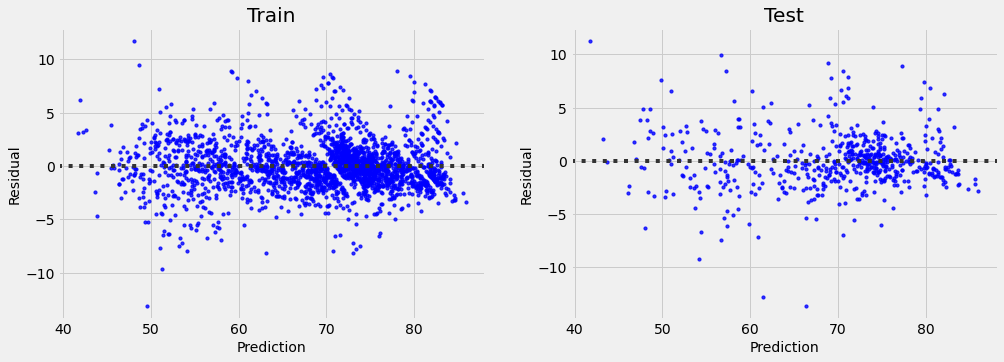

In [69]:
plot_residual(X_train, y_train, X_test, y_test, model)

`The residual plot spread the data better than before when I used transform by yeo-johnson`

# 10. Summary Result

In [70]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print('R2 Train :', r2_score(y_train, y_pred_train))
print('R2 Test :', r2_score(y_test, y_pred_test))
print('MAE Train :', mean_absolute_error(y_train, y_pred_train))
print('MAE Test :', mean_absolute_error(y_test, y_pred_test))
print('MSE Train :', mean_squared_error(y_train, y_pred_train))
print('MSE Test :', mean_squared_error(y_test, y_pred_test))
print('RMSE Train :', mean_squared_error(y_train, y_pred_train, squared=False))
print('RMSE Test :', mean_squared_error(y_test, y_pred_test, squared=False))

R2 Train : 0.9420767078953232
R2 Test : 0.9190507706844964
MAE Train : 1.6656363703959338
MAE Test : 1.8597203685588946
MSE Train : 5.312056358880024
MSE Test : 7.005159417087877
RMSE Train : 2.304789873042665
RMSE Test : 2.6467261696457904


# 11. Save Model

In [71]:
save_model(model.best_estimator_, "Life_Expectancy_Prediction_ElasticNet.pkl")

Model is pickled as model/Life_Expectancy_Prediction_ElasticNet.pkl
